# Other methods, week 12 demo

## Libraries and settings

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from math import sqrt

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cluster import KMeans

from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import RocCurveDisplay

In [21]:
float_formatter = "{:.4f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})

## Abalone data

In [24]:
abalone = pd.read_csv("abalone.csv")
print(abalone.columns)
abalone.head(2)

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7


In [23]:
df = abalone.drop("Sex", axis=1)
df.shape

(4177, 8)

ValueError: If using all scalar values, you must pass an index

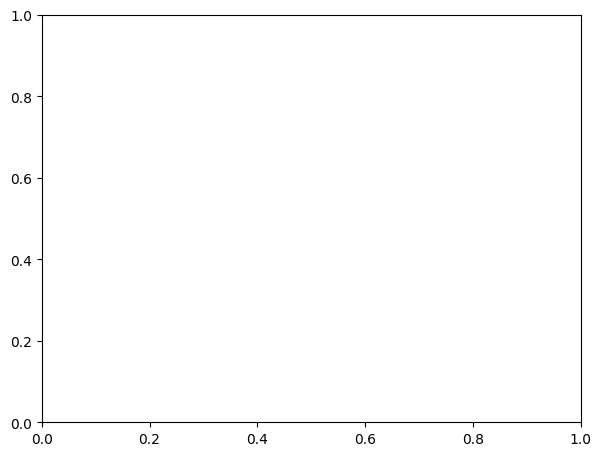

In [18]:
tmpList = df.columns.to_list()
subplot=1
plt.figure(figsize=(32,18))
for i in tmpList:
    plt.subplot(3,4,subplot)
    sns.histplot(data=df, x=1)
    subplot = subplot +1
plt.show()

In [19]:
df["Age"].hist(bins=15)
plt.show()

KeyError: 'Age'

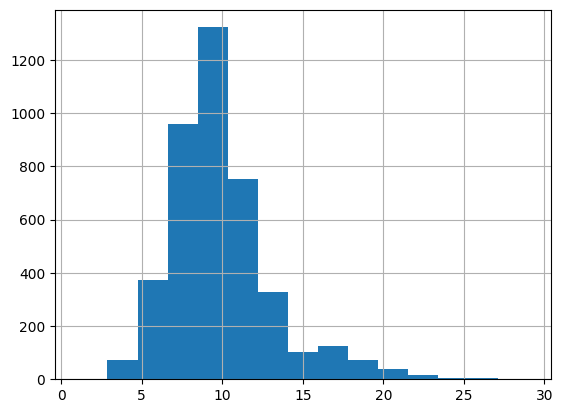

In [10]:
df["Rings"].hist(bins=15)
plt.show()

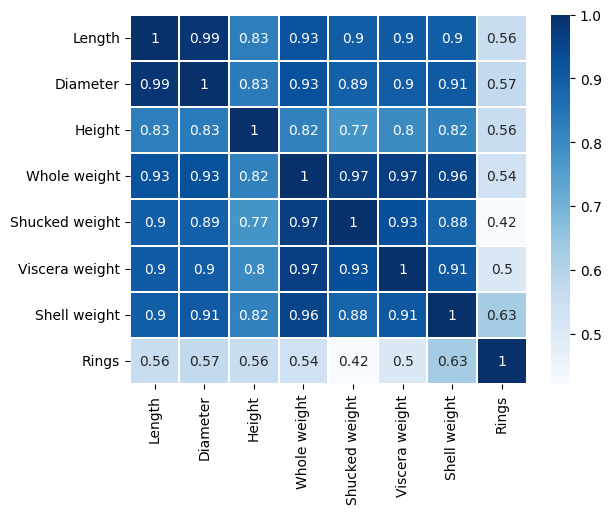

In [14]:
sns.heatmap(df.corr(), annot=True, linewidth=0.01, cmap='Blues')
plt.show()

In [ ]:
X = df.drop("Rings", axis=1)
X = X.values # convert dataframe to np.array
X.shape

In [ ]:
y = df.Rings
y = y.values

## K nearest neighbours regressor

In [7]:
# model is computed when predicting
# follows example at realpython.com/knn-python

In [ ]:
new_data_point = np.array([0.5, 0.4, 0.15, 1, 0.4, 0.2, 0.3])
distances = np.linalg.norm(X - new_data_point, axis=1)
print(distances.shape)
print(distances)

In [ ]:
k = 3
nearest_neighbour_ids =  distances.argsort()[:k]
nearest_neighbour_ids

In [ ]:
nn_rings = y[nearest_neighbour_ids]
nn_rings

In [ ]:
y_pred = nn_rings.mean()
y_pred

In [ ]:
# redo using sklearn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_train, y_train)

In [ ]:
train_predicts = model.predict(X_train)
mse = mean_squared_error(y_train, train_predicts)
rmse = sqrt(mse)
print(np.format_float_positional(rmse, precision=4)) # error in years

In [ ]:
test_predicts = model.predict(X_test)
mse = mean_squared_error(y_test, test_predicts)
rmse = sqrt(mse)
#print("%.4f {rmse} years".)
print(np.format_float_positional(rmse, precision=4))


In [ ]:
f, ax = plt.subplots()
points = ax.scatter(X_train[:,0], X_train[:,1], c=test_predicts, s=50)
f.colorbar(points)
plt.show()

In [ ]:
f, ax = plt.subplots()
points = ax.scatter(X_test[:,0], X_test[:,1], c=y_test, s=50)
f.colorbar(points)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {"n_neighbors": range(1,50)}
gs_model = GridSearchCV(KNeighborsRegressor(), params)
gs_model.fit(X_train, y_train)

In [ ]:
gs_model.best_params_

In [ ]:
model = KNeighborsRegressor(n_neighbors=22)
model.fit(X_train, y_train)

In [ ]:
train_predicts = model.predict(X_train)
mse = mean_squared_error(y_train, train_predicts)
print(sqrt(mse))
# less overfitting than k=3 - rmse higher for Training...

In [ ]:
test_predicts = model.predict(X_test)
mse = mean_squared_error(y_test, test_predicts)
print(sqrt(mse))
# while on Testing, slightly better error at 2.2 years rather than 2.4

In [ ]:
parameters = {
    "n_neighbors": range(1, 40),
    "weights": ["uniform", "distance"]
}
gs_model = GridSearchCV(KNeighborsRegressor(), parameters)
gs_model.fit(X_train, y_train)
gs_model.best_params_

In [ ]:
test_predicts = gs_model.predict(X_test)
mse = mean_squared_error(y_test, test_predicts)
print(sqrt(mse))
# a tiny improvement from RMSE 2.209 to 2.204

In [ ]:
bagged_knn = KNeighborsRegressor(n_neighbors=22, weights="distance")
from sklearn.ensemble import BaggingRegressor
bag_model = BaggingRegressor(bagged_knn, n_estimators=100)
bag_model.fit(X_train, y_train)
test_preds_grid = bag_model.predict(X_test)
mse = mean_squared_error(y_test, test_preds_grid)
print(sqrt(mse))
# tiny improvement and only on third run of ensemble bagging

## xgboost